In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

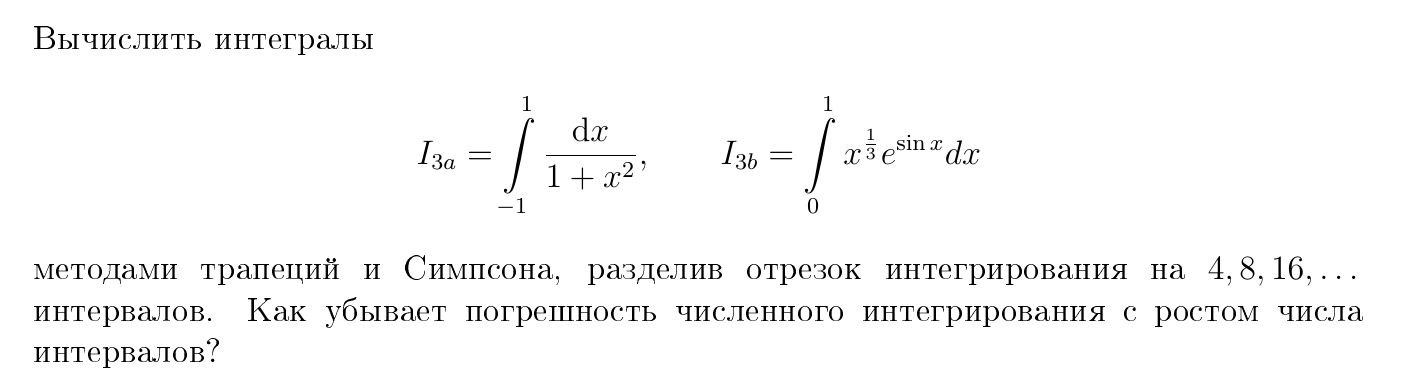

In [2]:
Image(filename='task 3.png')

In [2]:
def f(x):
    return 1/(1 + pow(x, 2))

def g(x):
    return pow(x, 1/3) * np.exp(np.sin(x))

In [3]:
n = 1024

a_left = -1
a_right = 1

b_left = 0
b_right = 1

In [4]:
def Trapeze(func, left, right, n_intervals):
    vfunc = np.vectorize(func)

    h = (right-left)/n_intervals
    dots = np.arange(left, right+h, h)
    values = vfunc(dots)

    res = (values[0] + values[-1])/2
    res += np.sum(values[1:-1])
    res *= h
    return res

In [5]:
print("Trapeze method for integral A gives result %1.10f using %d intervals" %
      (Trapeze(f, a_left, a_right, n), n))

print("Trapeze method for integral B gives result %1.10f using %d intervals" %
      (Trapeze(g, b_left, b_right, n), n))

Trapeze method for integral A gives result 1.5707960089 using 1024 intervals
Trapeze method for integral B gives result 1.2958472950 using 1024 intervals


$\LARGE$
For Trapeze method $\Large\displaystyle R \sim \frac{1}{N^2}$

In [6]:
def Simpson(func, left, right, n_intervals):
    vfunc = np.vectorize(func)

    h = (right-left)/n_intervals
    dots = np.arange(left, right+h, h)
    values = vfunc(dots)

    res = values[0] + values[-1]
    res += np.sum([values[i]*pow(2, i%2+1) for i in range(1, n_intervals)])
    res *= (h/3)
    return res

In [7]:
print("Simpson method for integral A gives result %1.10f using %d intervals" %
      (Simpson(f, a_left, a_right, n), n))

print("Simpson method for integral B gives result %1.10f using %d intervals" %
      (Simpson(g, b_left, b_right, n), n))

Simpson method for integral A gives result 1.5707963268 using 1024 intervals
Simpson method for integral B gives result 1.2958607523 using 1024 intervals


In [8]:
# print(pow(2, 3%2+1))

$\LARGE$
For Simpson method $\Large\displaystyle R \sim \frac{1}{N^4}$

In [9]:
def GetDiffs(count, method, func, l, r):
    cur = method(func, l, r, 1)
    prev = 0
    res = []

    # for i in range(1, count):
    #     prev = cur
    #     cur = method(func, l, r, pow(2, i))

    for i in range(2, count):
        prev = cur
        cur = method(func, l, r, i)

        res.append(abs(cur-prev))
    return res

In [10]:
powers_count = 128

trapeze_f_diffs = GetDiffs(powers_count, Trapeze, f, a_left, a_right)
simpson_f_diffs = GetDiffs(powers_count, Simpson, f, a_left, a_right)

trapeze_g_diffs = GetDiffs(powers_count, Trapeze, g, b_left, b_right)
simpson_g_diffs = GetDiffs(powers_count, Simpson, g, b_left, b_right)

Text(0.5, 1.0, 'g')

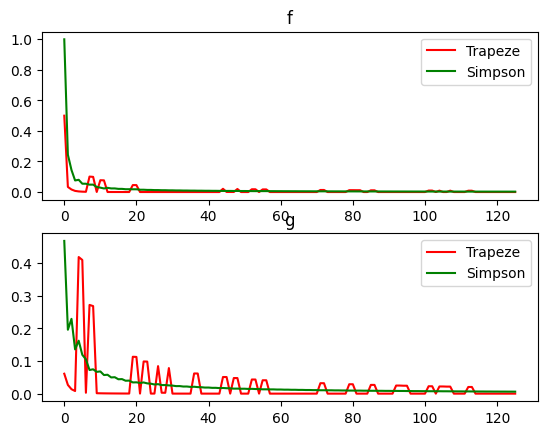

In [11]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(trapeze_f_diffs, color='r', label='Trapeze')
axs[0].plot(simpson_f_diffs, color='g', label='Simpson')
# axs[0].set_ylim([0, 0.5])
axs[0].legend(loc="upper right")
axs[0].set_title('f')

axs[1].plot(trapeze_g_diffs, color='r', label='Trapeze')
axs[1].plot(simpson_g_diffs, color='g', label='Simpson')
axs[1].legend(loc="upper right")
axs[1].set_title('g')

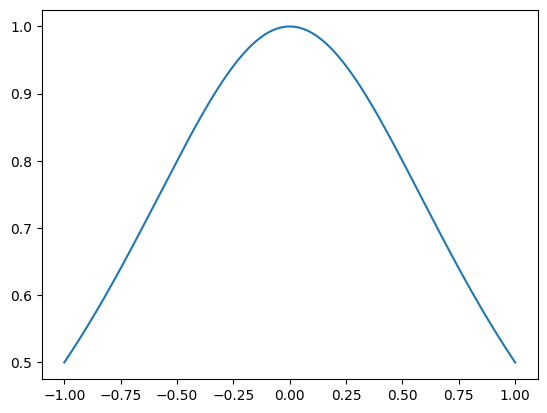

In [12]:
t = np.linspace(a_left, a_right, n)
plt.plot(t, f(t))

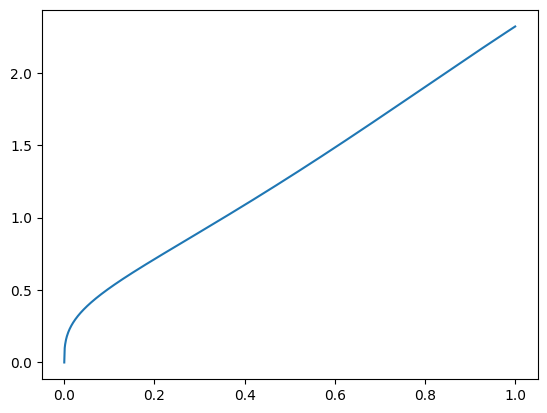

In [13]:
t = np.linspace(b_left, b_right, n)
plt.plot(t, g(t))